<a href="https://colab.research.google.com/github/Kirteeshukl/Random-Forest-ML/blob/main/Gold_Price_Prediction_Random_Forest_Regressor_Kirtee61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 8 : Aim :- To Predict gold price using Random Forest Regressor

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data_Kirtee61 = pd.read_csv('/content/gld_price_data_Kirtee61.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data_Kirtee61.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data_Kirtee61.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data_Kirtee61.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data_Kirtee61.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data_Kirtee61.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data_Kirtee61.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [10]:
correlation = gold_data_Kirtee61.corr()

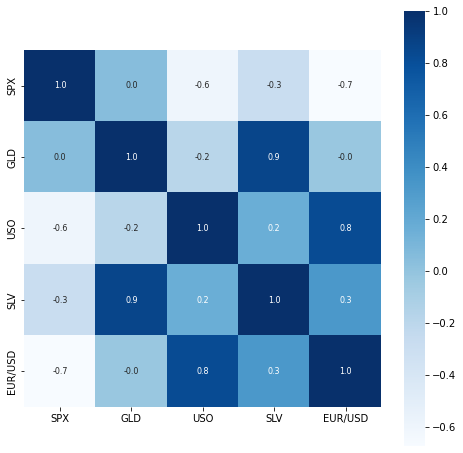

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


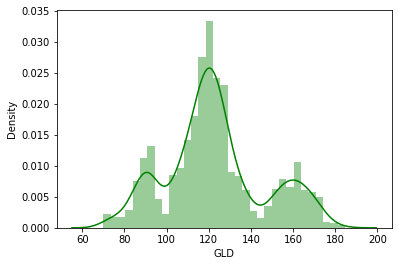

In [13]:
# checking the distribution of the GLD Price
sns.distplot(gold_data_Kirtee61['GLD'],color='green')

Splitting the Features and Target

In [14]:
X = gold_data_Kirtee61.drop(['Date','GLD'],axis=1)
Y = gold_data_Kirtee61['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [24]:
X_train_Kirtee61, X_test_Kirtee61, Y_train_Kirtee61, Y_test_Kirtee61 = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# training the model
regressor.fit(X_train_Kirtee61,Y_train_Kirtee61)

RandomForestRegressor()

Model Evaluation

In [29]:
# prediction on Test Data
test_data_prediction_Kirtee61 = regressor.predict(X_test_Kirtee61)

In [30]:
print(test_data_prediction_Kirtee61)

[168.7037993   82.2753999  116.15210024 127.70170049 120.65170122
 154.67309706 150.60729791 126.15659987 117.52449876 125.95910083
 116.91820086 171.4945007  141.15029794 167.74599861 115.12460019
 117.42630068 140.40630248 170.28790064 159.33020317 160.69939935
 155.25060004 125.2164004  175.24949992 157.3398035  125.22390058
  93.90109962  77.87069979 120.87869996 119.10449912 167.55929971
  88.12540039 125.24789993  91.10140053 117.69040007 121.0572991
 136.79330113 115.64910115 114.88430072 148.66309963 107.19550084
 103.98230228  87.17789782 126.56900033 118.11249999 153.60449941
 119.5397     108.43489996 107.87139794  93.11870019 127.18039763
  74.50340038 113.69779925 121.29960025 111.19339927 118.84159898
 120.72319911 158.75270013 169.60380125 146.92119704  85.7773984
  94.28000029  86.82239873  90.62470007 119.02040039 126.50720073
 127.55259962 170.54810078 122.24209939 117.42109904  98.7653002
 168.5797014  142.84479818 133.0886024  121.12600236 121.57509924
 119.82240038

In [31]:
# R squared error
error_score = metrics.r2_score(Y_test_Kirtee61, test_data_prediction_Kirtee61)
print("R squared error : ", error_score)

R squared error :  0.9893549621351564


Compare the Actual Values and Predicted Values in a Plot

In [33]:
Y_test_Kirtee61 = list(Y_test_Kirtee61)

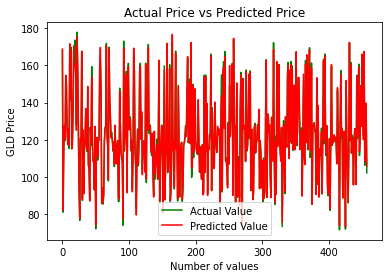

In [37]:
plt.plot(Y_test_Kirtee61, color='green', label = 'Actual Value')
plt.plot(test_data_prediction_Kirtee61, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()